Converged with chi-squared 416.2629091134803
Number of degrees of freedom, dof = 5
Reduced chi-squared  83.25258182269606
Inital guess values:
  p0 = [5.0, 0.1, 0.01]
Best fit values:
  pf = [5.46091944 0.01456162 0.08090779]
Uncertainties in the best fit values:
  pferr = [0.22869744041874038, 0.00024565561068472475, 0.0009168378879271486]
-----------------------------------------------------------
Converged with chi-squared 10.00643416209684
Number of degrees of freedom, dof = 5
Reduced chi-squared  2.001286832419368
Inital guess values:
  p0 = [0.0001, 0.01, 0.01]
Best fit values:
  pf = [-9.19620098e-07  5.04648405e-04  8.00157818e-01]
Uncertainties in the best fit values:
  pferr = [2.9169589915533038e-08, 2.7796674135622097e-05, 0.006185148812439004]


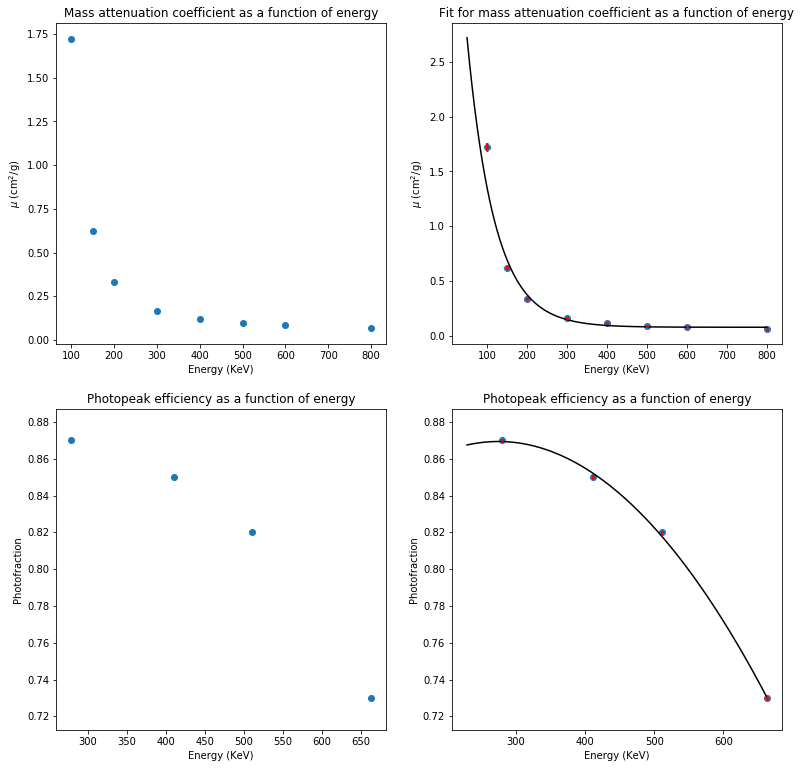

In [29]:
#Most of this code was written by Praveen Balaji. Vasily Soloview made a few edits to get it to work with his data.

import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

# Efficiency is a combination of efficiency of photons passing through the material
# and efficiency of those photons to deposit all their energy (full-peak to spectrum)
# ratio

# Mass attenuation of NaI is I/I_0 = exp (-mu*rho*x). Length and density are fixed
# rho = 3.76 g/cm^2 and x = approx 5 cm

# mu fit

mu_energy = np.array([100,150,200,300,400,500,600,800])
mu = np.array([1.72,0.625,0.334,0.167,0.117,0.0955,0.0826,0.0676])
# m_uncertainty for medium Z values between 10 KeV and 1 MeV is 1 to 2 percent
mu_unc = mu*0.02


fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(221)
ax.set_title("Mass attenuation coefficient as a function of energy")
ax.set_xlabel('Energy (KeV)')
ax.set_ylabel('$\mu$ (cm$^{2}$/g)')
ax.scatter(mu_energy, mu)

def fitfunc(p,x):
    return p[0]*np.exp(-p[1]*x) + p[2]
def residual(p, x, y, err):
    return (fitfunc(p, x)-y)/err

p0 = [5.,0.1,0.01]

pf, cov, info, mesg, success = optimize.leastsq(residual, p0, args=(mu_energy, mu, mu_unc),
                                                full_output=1)

if cov is None:
    print('Fit did not converge')
    print('Success code:', success)
    print(mesg)
else:
    chisq = sum(info['fvec']*info['fvec'])
    dof = len(mu_energy) - len(pf)
    pferr = [np.sqrt(cov[i,i]) for i in range(len(pf))]
    print('Converged with chi-squared', chisq)
    print('Number of degrees of freedom, dof =', dof)
    print('Reduced chi-squared ', chisq/dof)
    print('Inital guess values:')
    print('  p0 =', p0)
    print('Best fit values:')
    print('  pf =', pf)
    print('Uncertainties in the best fit values:')
    print('  pferr =', pferr)

pf_mu = pf; pferr_mu = pferr

ax = fig.add_subplot(222)
ax.set_title("Fit for mass attenuation coefficient as a function of energy")
ax.set_xlabel('Energy (KeV)')
ax.set_ylabel('$\mu$ (cm$^{2}$/g)')
ax.scatter(mu_energy, mu)
E = np.linspace(min(mu_energy-50), max(mu_energy), 5000)
ax.plot(E, fitfunc(pf, E), 'black', label='Fit')
ax.errorbar(mu_energy, mu, mu_unc, fmt='o', label = 'Data in Fit',markersize=2,capsize=1, elinewidth=2,color='red')


# Similar approach with photofraction efficiency

ph_energy = np.array([279,411,511,663])
ph = np.array([0.87,0.85,0.82,0.73])
# Uncertainty chosen by inspection
ph_unc = np.array([0.001]*len(ph_energy))

ax = fig.add_subplot(223)
ax.set_title("Photopeak efficiency as a function of energy")
ax.set_xlabel('Energy (KeV)')
ax.set_ylabel('Photofraction')
ax.scatter(ph_energy, ph)

print("-----------------------------------------------------------")

def fitfunc_ph(p,x):
    return p[0]*(x**2) + p[1]*x + p[2]
def residual_ph(p, x, y, err):
    return (fitfunc_ph(p, x)-y)/err

p0 = [0.0001,0.01,0.01]

pf, cov, info, mesg, success = optimize.leastsq(residual_ph, p0, args=(ph_energy, ph, ph_unc),
                                                full_output=1)

if cov is None:
    print('Fit did not converge')
    print('Success code:', success)
    print(mesg)
else:
    chisq = sum(info['fvec']*info['fvec'])
    dof = len(mu_energy) - len(pf)
    pferr = [np.sqrt(cov[i,i]) for i in range(len(pf))]
    print('Converged with chi-squared', chisq)
    print('Number of degrees of freedom, dof =', dof)
    print('Reduced chi-squared ', chisq/dof)
    print('Inital guess values:')
    print('  p0 =', p0)
    print('Best fit values:')
    print('  pf =', pf)
    print('Uncertainties in the best fit values:')
    print('  pferr =', pferr)


pf_ph = pf; pferr_ph = pferr


ax = fig.add_subplot(224)
ax.set_title("Photopeak efficiency as a function of energy")
ax.set_xlabel('Energy (KeV)')
ax.set_ylabel('Photofraction')
ax.scatter(ph_energy, ph)
E = np.linspace(min(ph_energy-50), max(ph_energy), 5000)
ax.plot(E, fitfunc_ph(pf, E), 'black', label='Fit')
ax.errorbar(ph_energy, ph, ph_unc, fmt='o', label = 'Data in Fit',markersize=2,capsize=1, elinewidth=2,color='red')


# Efficiency for the full peak is given by the efficiency of the photons getting throught the dectector and
# and then the efficiency of those photons to deposit all their energy. We can back out the amount of photons at the detector with
# the following : N/(eps)

def in_eff(E, E_unc):

  # Calculate instrinsic uncertainty of NaI

  # Calculate value and uncertainty in mu

    val_mu = pf_mu[0]*np.exp(-pf_mu[1]*E) + pf_mu[2]
    #unc_mu_exp_frac = np.sqrt((pferr_mu[1]/pf_mu[1])**2 + (E_unc/E)**2)/(np.exp(pf_mu[1]*E))
    #unc_mu = (np.sqrt((pferr_mu[0]/pf_mu[0])**2 + (unc_mu_exp_frac)**2)*pf_mu[0]*np.exp(pf_mu[1]*E))**2 + (pferr[2])**2
    unc_mu = np.sqrt((np.exp(-pf_mu[1]*E)*pferr_mu[0])**2+(-E*np.exp(-pf_mu[1]*E)*pferr_mu[1])**2
                     +(-pf_mu[1]*np.exp(-pf_mu[1]*E)*E_unc)**2+(pferr_mu[2])**2)
  # Calculate end value. Rho is 3.67 and x is 5.0

    val = 1-np.exp(-val_mu*3.67*5.0)

    unc_val = np.sqrt((3.67*5.0*np.exp(-val_mu*3.67*5.0)*unc_mu)**2)

    return (val, unc_val)

def ph_eff (E, E_unc):

  # Calculate uncertainty for photopeak

    val_ph = pf_ph[0]*((E)**2) + pf_ph[1]*(E) + pf_ph[2]
    unc_ph_fst = np.sqrt((pferr_ph[0]/pf_ph[0])**2 + 2*((E_unc/E)**2))*pf_ph[0]*((E)**2)
    unc_ph_sec = np.sqrt((pferr_ph[0]/pf_ph[0])**2 + (E_unc/E)**2)*pf_ph[1]*(E)
    unc_ph_thrd = (pferr_ph[2])
    unc_total = (unc_ph_fst)**2 + (unc_ph_sec)**2 + (unc_ph_thrd)**2

    return (val_ph, unc_total)
  
def incident_photons(N, N_unc, E, E_unc):
    photo = ph_eff(E, E_unc); intrin = in_eff(E, E_unc)
    real_counts = N/(photo[0]*intrin[0])
    unc_real_counts = np.sqrt((N_unc/N)**2 + (photo[1]/photo[0])**2 + (intrin[1]/intrin[0])**2)*real_counts

    return [real_counts, unc_real_counts]


  




In [34]:
Rate = np.array([21.0, 18.5, 13.7, 9.4, 6.33, 6.0, 5.78])
dRate = np.array([0.3, 0.3, 0.4, 0.2, 0.10, 0.2, 0.09])
E = np.array([618., 579., 459., 414., 295., 260., 232.])
dE = np.array([8., 8., 6., 6., 4., 4., 4.])

#in_eff(E, dE)
#ph_eff(E, dE)

#incident_photons(21.0, 0.3, 618., 8.)
incident_photons(Rate, dRate, E, dE)

[array([35.56049425, 30.3158413 , 20.43148495, 13.43016442,  7.7313575 ,
         7.06780278,  6.71085025]),
 array([0.53674273, 0.51283121, 0.60352698, 0.29190883, 0.12585795,
        0.23623698, 0.104777  ])]